In [61]:
import pandas as pd

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [63]:
with zipfile.ZipFile('BitFinexData.zip', 'r') as dataset:
    dataset.extractall('BitFinex')

In [65]:
bitcoin = pd.read_csv('BitFinex/Bitfinex_BTCUSD_d.csv', skiprows=1)

<AxesSubplot:>

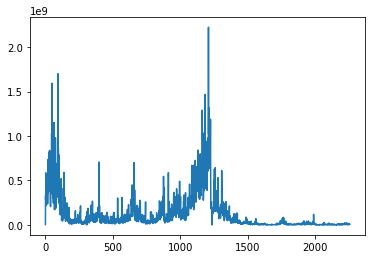

In [66]:
bitcoin['Volume USD'].plot()

<AxesSubplot:>

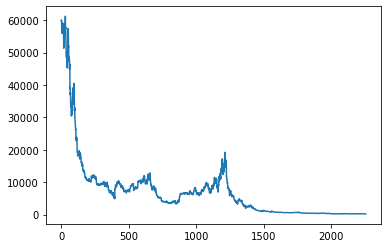

In [23]:
bitcoin.open.plot()

<AxesSubplot:>

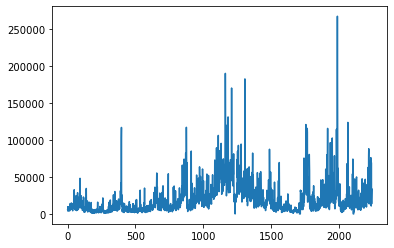

In [108]:
bitcoin["Volume BTC"].plot()

In [67]:
bitcoin['open_14_days'] = bitcoin['open'][::-1].rolling(window=14).mean()
bitcoin['close_max_7d'] = bitcoin['close'][::-1].rolling(window=7).max()

In [68]:
for day in range(1, 8):
    bitcoin[f'close_day_{day}'] = bitcoin['close'][::-1].shift(day+1)

In [69]:
bitcoin['dt'] = pd.to_datetime(bitcoin['date'])

In [70]:
bitcoin['weekday'] = bitcoin['dt'].dt.weekday
bitcoin['month'] = bitcoin['dt'].dt.month
bitcoin['year'] = bitcoin['dt'].dt.year

In [71]:
bitcoin['target'] = bitcoin['close'].shift(1)

In [72]:
bitcoin[['date', 'close', 'target']].head()

,date,close,target
0,2021-04-13 00:00:00,60240.0,NaN
1,2021-04-12 00:00:00,59874.0,60240.0
2,2021-04-11 00:00:00,60032.0,59874.0
3,2021-04-10 00:00:00,59812.0,60032.0
4,2021-04-09 00:00:00,58134.0,59812.0


<AxesSubplot:>

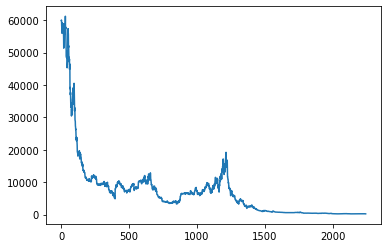

In [99]:
bitcoin.close.plot()

In [73]:
bitcoin = pd.get_dummies(bitcoin, columns=["weekday", "month", "year"])
bitcoin.drop("date", axis=1, inplace=True)
bitcoin.drop("unix", axis=1, inplace=True)
bitcoin.drop("symbol", axis=1, inplace=True)
bitcoin.drop("dt", axis=1, inplace=True)
# dropna - удалить строки
# fillna - заполнить строчки
bitcoin.dropna(inplace=True)
bitcoin.head()

,open,high,low,close,Volume USD,Volume BTC,open_14_days,close_max_7d,close_day_1,close_day_2,...,month_10,month_11,month_12,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021
1,60033.000000,61338.0,59492.0,59874.0,3.291828e+08,5497.925195,58389.918730,60032.0,59812.0,58134.0,...,0,0,0,0,0,0,0,0,0,1
2,59817.073785,60722.0,59308.0,60032.0,2.789436e+08,4646.581998,58086.347301,60032.0,58134.0,58110.0,...,0,0,0,0,0,0,0,0,0,1
3,58134.090643,61243.0,57900.0,59812.0,5.858312e+08,9794.542479,57805.199174,59812.0,58110.0,55962.0,...,0,0,0,0,0,0,0,0,0,1
4,58110.000000,58880.0,57713.0,58134.0,2.179731e+08,3749.493697,57580.049842,59145.0,55962.0,57991.0,...,0,0,0,0,0,0,0,0,0,1
5,55962.000000,58155.0,55714.0,58110.0,2.604657e+08,4482.287596,57097.714896,59145.0,57991.0,59145.0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
y = bitcoin.target
X = bitcoin.drop("target", axis=1)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
from sklearn.metrics import max_error, mean_absolute_error, r2_score

In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 786 to 861
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          1502 non-null   float64
 1   high          1502 non-null   float64
 2   low           1502 non-null   float64
 3   close         1502 non-null   float64
 4   Volume USD    1502 non-null   float64
 5   Volume BTC    1502 non-null   float64
 6   open_14_days  1502 non-null   float64
 7   close_max_7d  1502 non-null   float64
 8   close_day_1   1502 non-null   float64
 9   close_day_2   1502 non-null   float64
 10  close_day_3   1502 non-null   float64
 11  close_day_4   1502 non-null   float64
 12  close_day_5   1502 non-null   float64
 13  close_day_6   1502 non-null   float64
 14  close_day_7   1502 non-null   float64
 15  weekday_0     1502 non-null   uint8  
 16  weekday_1     1502 non-null   uint8  
 17  weekday_2     1502 non-null   uint8  
 18  weekday_3     1502 non-null

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
model = LinearRegression()

In [81]:
model.fit(X_train, y_train) #  Обучение

LinearRegression()

In [82]:
y_pred = model.predict(X_test) #  Экзамен

In [83]:
print("Max Error =", max_error(y_test, y_pred))
print("MAE =", mean_absolute_error(y_test, y_pred))
print("R2 =", r2_score(y_test, y_pred))

Max Error = 7308.19109963841
MAE = 235.81689245700534
R2 = 0.9968263783522976


In [84]:
model = LinearRegression(positive=True)
model.fit(X_train, y_train) #  Обучение
y_pred = model.predict(X_test) #  Экзамен
print("Max Error =", max_error(y_test, y_pred))
print("MAE =", mean_absolute_error(y_test, y_pred))
print("R2 =", r2_score(y_test, y_pred))

Max Error = 6280.798335476167
MAE = 227.91854433555702
R2 = 0.9971409276069231


In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
model = RandomForestRegressor(max_depth=10,random_state=42)
model.fit(X_train, y_train) #  Обучение
y_pred = model.predict(X_test) #  Экзамен
print("Max Error =", max_error(y_test, y_pred))
print("MAE =", mean_absolute_error(y_test, y_pred))
print("R2 =", r2_score(y_test, y_pred))

Max Error = 6018.726650286393
MAE = 245.21317144320025
R2 = 0.996363133858801


In [87]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=42)

params = {
    "n_estimators": [50, 100, 500],
    "max_depth": [3, 10],
    "min_samples_split": [2, 4]
}
gs = GridSearchCV(model, params, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 10], 'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             scoring='neg_mean_squared_error')

In [88]:
gs.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [89]:
gs.best_score_

-414865.30294523283

In [90]:
best_model = gs.best_estimator_

In [91]:
import pickle 

f = open("rfr.model", "wb") # Открываем файл
pickle.dump(best_model, f)  # Записываем обученную модель в файл

In [92]:
my_model_file = open("rfr.model", "rb")
my_model = pickle.load(my_model_file)
my_model

RandomForestRegressor(max_depth=10, random_state=42)